# Analysis of within-list blocks

The sample dataset includes blocks within each list, ranging from length 2 to 6. Here, we'll demonstrate how columns can be added to the data to analyze these blocks.

In [1]:
import numpy as np
from scipy.spatial.distance import squareform
import seaborn as sns
from psifr import fr

In [2]:
raw = fr.sample_data("Morton2013")
raw["category"] = raw["category"].astype("category").cat.as_ordered()
mixed = raw.query("list_type == 'mixed'")

First, split the data into study and recall events. We'll later merge these events together to make a unified data table.

In [3]:
study = mixed.query("trial_type == 'study'").copy()
recall = mixed.query("trial_type == 'recall'").copy()

For some advanced analyses, we'll analyze based on the block structure in the data. This requires adding two columns: the block index and the maximum number of blocks in each list.

In [4]:
# add label to study events indicating the block
list_category = study.groupby(["subject", "list"])["category"]
study["block"] = list_category.transform(fr.block_index)

# get the number of blocks for each study list
study["n_block"] = study.groupby(["subject", "list"])["block"].transform(max)

We'll also look at position within block. This requires two more columns: block position and block length.

In [5]:
block_keys = ["subject", "list", "block"]
study["block_pos"] = study.groupby(block_keys)["position"].cumcount() + 1
study["block_len"] = study.groupby(block_keys)["block_pos"].transform(max)

Display one list to check our new block-related columns.

In [6]:
fr.filter_data(study, subjects=1, lists=2)

,subject,list,position,trial_type,item,item_number,session,list_type,category,response,response_time,list_category,block,n_block,block_pos,block_len
43,1,2,1,study,SEAN PENN,229,1,mixed,cel,3.0,1.255,mixed,1,6,1,2
44,1,2,2,study,AUDREY HEPBURN,20,1,mixed,cel,3.0,1.040,mixed,1,6,2,2
45,1,2,3,study,ST PATRICKS CATHEDRAL,464,1,mixed,loc,2.0,1.164,mixed,2,6,1,4
46,1,2,4,study,LES INVALIDES,365,1,mixed,loc,2.0,0.829,mixed,2,6,2,4
47,1,2,5,study,GREAT ZIMBABWE RUINS,341,1,mixed,loc,3.0,0.872,mixed,2,6,3,4
48,1,2,6,study,BRYCE CANYON,282,1,mixed,loc,2.0,1.241,mixed,2,6,4,4
49,1,2,7,study,TROPHY,746,1,mixed,obj,3.0,0.862,mixed,3,6,1,2
50,1,2,8,study,BRUSH,549,1,mixed,obj,3.0,0.779,mixed,3,6,2,2
51,1,2,9,study,SUPREME COURT,470,1,mixed,loc,2.0,1.245,mixed,4,6,1,4
52,1,2,10,study,SAN FRANCISCO,445,1,mixed,loc,4.0,0.854,mixed,4,6,2,4


In [7]:
# list_keys: columns to include for both study and recall events
# study_keys: columns to include for study events only
data = fr.merge_lists(
    study, 
    recall, 
    list_keys=["list_type"], 
    study_keys=["category", "block", "n_block", "block_pos", "block_len"]
)
clean = data.query("repeat == 0 and ~intrusion")

### Recall by block

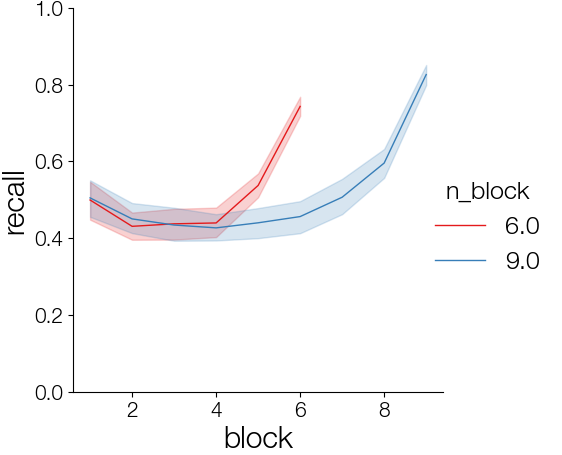

In [8]:
# get recall by block, separated by the number of blocks in each list
rec = clean.groupby(["subject", "n_block", "block"])["recall"].mean()
g = sns.relplot(
    kind="line", 
    x="block", 
    y="recall", 
    palette="Set1",
    hue="n_block", 
    data=rec.reset_index()
)
g.set(ylim=(0, 1));

### Recall by position within block

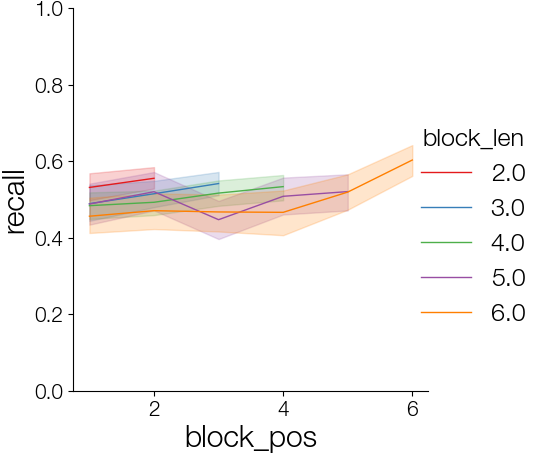

In [9]:
rec = clean.groupby(["subject", "block_len", "block_pos"])["recall"].mean()
g = sns.relplot(
    kind="line", 
    x="block_pos", 
    y="recall",
    palette="Set1",
    hue="block_len", 
    data=rec.reset_index(),
)
g.set(ylim=(0, 1));

In [10]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.10.6
IPython version      : 8.5.0

numpy  : 1.23.4
seaborn: 0.12.0
psifr  : 0.8.2

